In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, mannwhitneyu, shapiro, pearsonr, spearmanr

# ==========================================
# 1. LOAD AND PREPARE DATA
# ==========================================
# Use your exact filename here
file_path = '/Users/nikolaialtergott/Desktop/Bachelor-Arbeit/Analysis/Survey-Data-19_12_25 - results-survey792553-3.csv'
df = pd.read_csv(file_path)

### Data Preparation

In [57]:
# A. IDENTIFY GROUPS
# Find the column with "randomAssign" and rename it to 'Group'
group_col_candidates = [c for c in df.columns if "randomAssign" in c]
if group_col_candidates:
    group_col = group_col_candidates[0]
    df = df.rename(columns={group_col: 'Group'})

    df["Group"] = df["Group"].map({
            1: "Control Group",
            2: "Experiment Group"
        })
    print(f"✅ Group column found: '{group_col}' -> Renamed to 'Group'")
else:
    print("⚠️ WARNING: Could not find 'randomAssign' column. Check your CSV header.")


# C. DEFINE VARIABLES
understanding_metrics = ["Factual Score", "Comprehension Score", "Understanding Score"]
confidence_metrics = ["Confidence Score"]
efficiency_metrics = ["Question Answering Time"]

all_metrics = understanding_metrics + confidence_metrics + efficiency_metrics

# Ensure metrics are numeric
for m in all_metrics:
    df[m] = pd.to_numeric(df[m], errors='coerce')

# Clean Data for invalid entries

initial_count = len(df)

df_cleaned = df[df["Question Answering Time"] >= 60].copy()

print(f"Initial participants: {initial_count}")
print(f"Final sample size: {len(df_cleaned)}")

df_cleaned.info

✅ Group column found: '{if(is_empty(randomAssign), counter, randomAssign)}' -> Renamed to 'Group'
Initial participants: 26
Final sample size: 25


<bound method DataFrame.info of     Response ID       Date submitted  Last page         Date started  \
1             6  2025-11-14 11:49:11          4  2025-11-14 11:43:13   
2             8  2025-11-14 17:27:17          4  2025-11-14 17:18:06   
3             9  2025-11-14 21:35:51          4  2025-11-14 21:24:03   
4            10  2025-11-15 16:44:16          4  2025-11-15 12:00:31   
5            14  2025-11-17 21:37:51          4  2025-11-17 21:21:07   
6            15  2025-11-18 17:37:01          4  2025-11-18 17:27:44   
7            17  2025-11-19 11:38:29          4  2025-11-19 11:33:22   
8            22  2025-11-19 13:18:18          4  2025-11-19 13:04:20   
9            25  2025-11-19 16:39:58          4  2025-11-19 16:17:48   
10           26  2025-11-19 18:05:48          4  2025-11-19 17:31:07   
11           28  2025-11-21 11:27:58          4  2025-11-21 11:01:36   
12           30   2025-11-24 0:17:35          4   2025-11-24 0:01:56   
13           32  2025-11-24 12:0

## Understanding Analysis


   PART 1: DESCRIPTIVE STATISTICS TABLE

--- Summary Table ---
           Variable            Group  Count  Mean  Median  Mode  Std Dev  Min  Max
      Factual Score    Control Group     12  3.75     4.0     4     0.87    1    4
      Factual Score Experiment Group     13  3.69     4.0     4     0.63    2    4
Comprehension Score    Control Group     12  2.75     3.0     3     1.06    0    4
Comprehension Score Experiment Group     13  3.69     4.0     4     0.75    2    4
Understanding Score    Control Group     12  6.50     7.0     7     1.83    1    8
Understanding Score Experiment Group     13  7.38     8.0     8     1.19    4    8

👉 TIP: You can copy the table above into Excel or Word.


/var/folders/w4/g7wb0fls7wj1c3p09ww9lx2r0000gn/T/ipykernel_36302/2024181749.py:56: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  sns.stripplot(x='Metric', y='Score', hue='Group', data=df_melted,


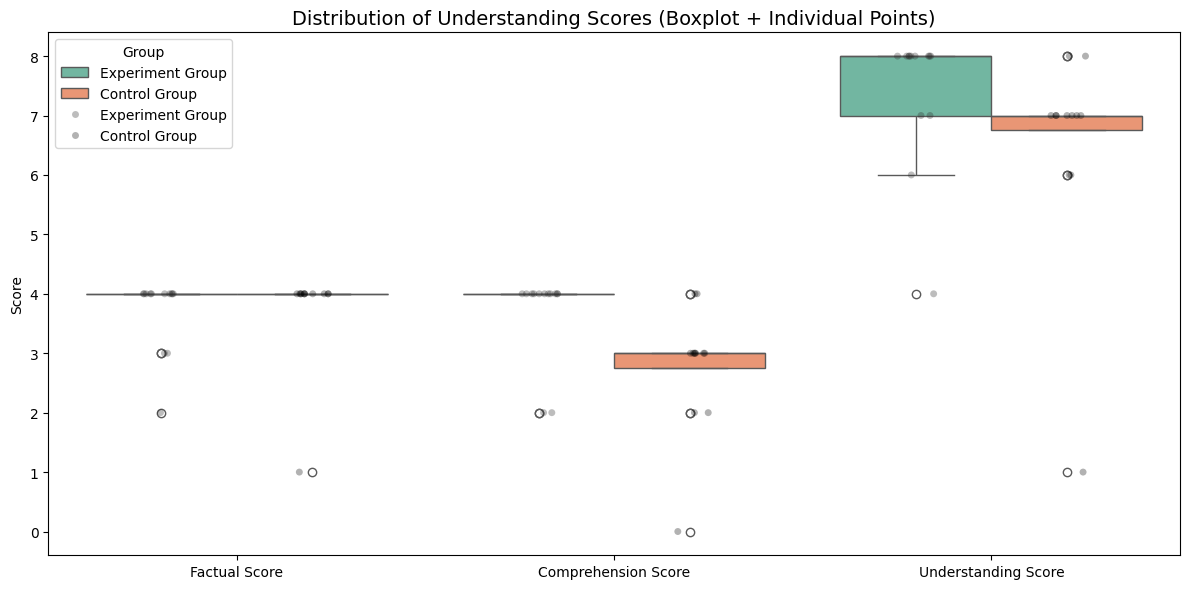


   PART 2: INFERENTIAL STATISTICS (Hypothesis Tests)
Comparing Group Control Group vs Group Experiment Group...

🔹 Analyzing: Factual Score
p_norm1: 3.0746542714503448e-06
p_norm2: 3.4769448742433754e-05
   T-Test p-value:       1.0000 
   Mann-Whitney U-Value: 90.0
   Mann-Whitney p-value: 0.7090 
   ⚠️ Data might be Skewed -> Mann-Whitney U is preferred.

🔹 Analyzing: Comprehension Score
p_norm1: 0.01955830136760028
p_norm2: 4.0251302202538165e-06
   T-Test p-value:       0.0083 (Significant)
   Mann-Whitney U-Value: 31.0
   Mann-Whitney p-value: 0.0033 (Significant)
   ⚠️ Data might be Skewed -> Mann-Whitney U is preferred.

🔹 Analyzing: Understanding Score
p_norm1: 0.0006299239176998305
p_norm2: 7.56923066956229e-05
   T-Test p-value:       0.0949 
   Mann-Whitney U-Value: 41.5
   Mann-Whitney p-value: 0.0203 (Significant)
   ⚠️ Data might be Skewed -> Mann-Whitney U is preferred.


   PART 3: CORRELATIONS (Score vs Time Spent)


In [58]:
# ==========================================
# 2. DESCRIPTIVE STATISTICS TABLE
# ==========================================
print("\n" + "="*60)
print("   PART 1: DESCRIPTIVE STATISTICS TABLE")
print("="*60)

# Custom function to get Mode (handles multiple modes by taking the first one)
def get_mode(x):
    m = x.mode()
    if not m.empty:
        return m.iloc[0]
    return np.nan

table_rows = []

for var in understanding_metrics:
    # Group by Group and calculate all stats
    stats = df_cleaned.groupby('Group')[var].agg([
        ('Count', 'count'),
        ('Mean', 'mean'),
        ('Median', 'median'),
        ('Mode', get_mode),
        ('Std Dev', 'std'),
        ('Min', 'min'),
        ('Max', 'max')
    ])
    
    # Add variable name for clarity
    stats['Variable'] = var
    stats = stats.reset_index() # Move Group to column
    
    # Reorder columns
    cols = ['Variable', 'Group', 'Count', 'Mean', 'Median', 'Mode', 'Std Dev', 'Min', 'Max']
    table_rows.append(stats[cols])

# Combine into one final dataframe
final_table = pd.concat(table_rows, ignore_index=True)

# Round for display
numeric_cols = ['Mean', 'Median', 'Mode', 'Std Dev', 'Min', 'Max']
final_table[numeric_cols] = final_table[numeric_cols].round(2)

print("\n--- Summary Table ---")
print(final_table.to_string(index=False))
print("\n👉 TIP: You can copy the table above into Excel or Word.")

# VISUALIZATION: Boxplots
# We melt the data to plot all 3 scores side-by-side easily
df_melted = df_cleaned.melt(id_vars=['Group'], value_vars=understanding_metrics, var_name='Metric', value_name='Score')

plt.figure(figsize=(12, 6))
# Boxplot shows the distribution and median
sns.boxplot(x='Metric', y='Score', hue='Group', data=df_melted, palette="Set2")
# Strip plot (dots) shows individual data points to spot outliers
sns.stripplot(x='Metric', y='Score', hue='Group', data=df_melted, 
              dodge=True, color='black', alpha=0.3, jitter=True)

plt.title('Distribution of Understanding Scores (Boxplot + Individual Points)', fontsize=14)
plt.ylabel('Score')
plt.xlabel('')
plt.legend(title='Group', loc='upper left')
plt.tight_layout()
plt.show()

# ==========================================
# 3. INFERENTIAL STATISTICS
# ==========================================
print("\n" + "="*60)
print("   PART 2: INFERENTIAL STATISTICS (Hypothesis Tests)")
print("="*60)

groups = sorted(df['Group'].dropna().unique())
if len(groups) >= 2:
    g1, g2 = groups[0], groups[1]
    print(f"Comparing Group {g1} vs Group {g2}...\n")

    for var in understanding_metrics:
        print(f"🔹 Analyzing: {var}")
        
        # Get clean data
        data_g1 = df[df['Group'] == g1][var].dropna()
        data_g2 = df[df['Group'] == g2][var].dropna()
        
        # Normality Check
        _, p_norm1 = shapiro(data_g1)
        print(f"p_norm1: {p_norm1}")

        _, p_norm2 = shapiro(data_g2)
        print(f"p_norm2: {p_norm2}")
        
        is_normal = (p_norm1 > 0.05) and (p_norm2 > 0.05)
        
        # Tests
        t_stat, p_ttest = ttest_ind(data_g1, data_g2)
        u_stat, p_mann = mannwhitneyu(data_g1, data_g2)
        
        print(f"   T-Test p-value:       {p_ttest:.4f} {'(Significant)' if p_ttest < 0.05 else ''}")
        print(f"   Mann-Whitney U-Value: {u_stat:.1f}")
        print(f"   Mann-Whitney p-value: {p_mann:.4f} {'(Significant)' if p_mann < 0.05 else ''}")
        
        if is_normal:
            print("   ✅ Data is Normal -> T-Test is preferred.")
        else:
            print("   ⚠️ Data might be Skewed -> Mann-Whitney U is preferred.")
        print("")
else:
    print("⚠️ Error: Less than 2 groups found. Cannot run T-Tests.")

# ==========================================
# 4. CORRELATIONS
# ==========================================
print("\n" + "="*60)
print("   PART 3: CORRELATIONS (Score vs Time Spent)")
print("="*60)

## Confidence Analysis

--- Reliability Analysis ---
Cronbach's Alpha for Confidence Scale: 0.6163
Interpretation: Marginal/Low (Standard threshold: 0.70)

--- Descriptive Statistics: Confidence ---
                  count      mean       std  min       25%       50%  \
Group                                                                  
Control Group      12.0  3.250000  0.683500  2.0  2.916667  3.333333   
Experiment Group   13.0  3.871795  0.616719  3.0  3.333333  4.000000   

                       75%  max  
Group                            
Control Group     3.750000  4.0  
Experiment Group  4.333333  5.0  


--- Hypothesis Testing ( Control Group vs Experiment Group ) ---
Shapiro-Wilk Normality p-values: Control Group=0.1550, Experiment Group=0.7434
Result: Data is normal. Reporting T-test.
T-test p-value: 0.0254 (SIGNIFICANT)
Cohen's d (Effect Size): 0.9573
Effect Size Interpretation: Large


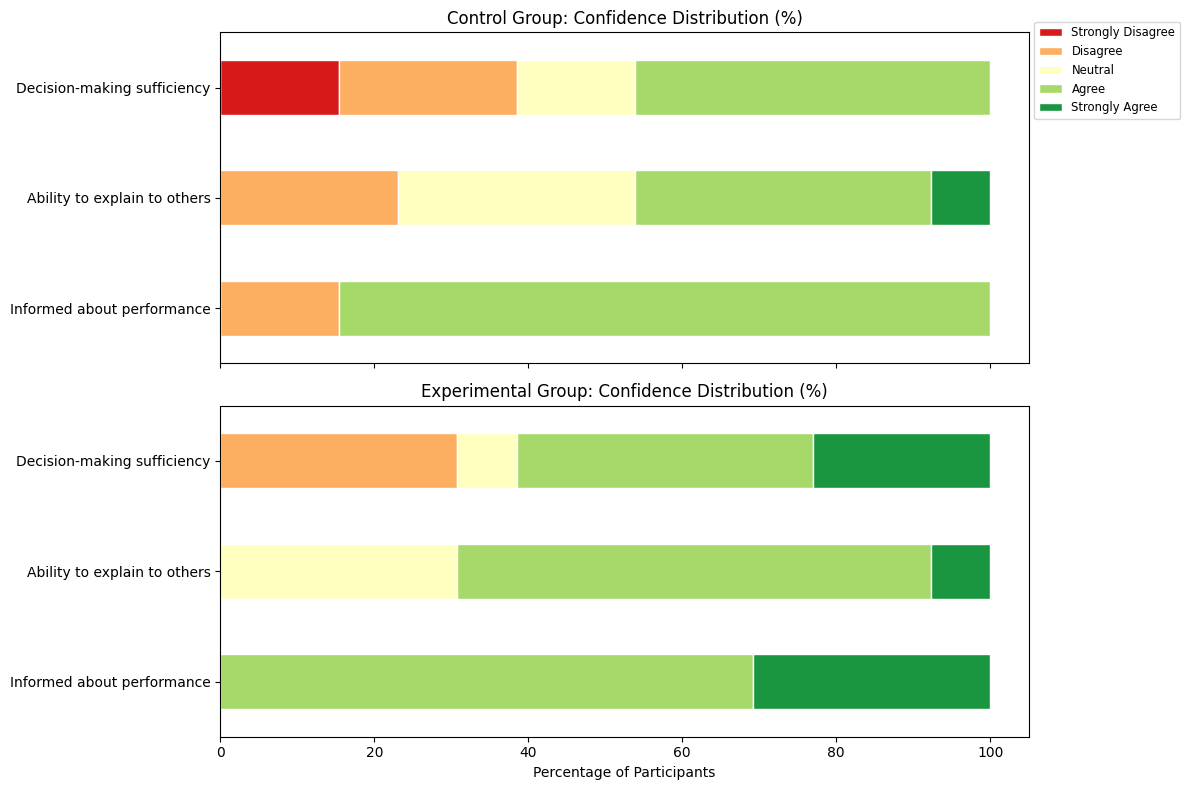

In [59]:
# 1. Define Scale Items
confidence_items = ['ConfScore1', 'ConfScore2', 'ConfScore3']

# 2. Reliability Analysis: Cronbach's Alpha
def calculate_cronbach_alpha(item_data):
    k = item_data.shape[1]  # Number of items
    item_variances = item_data.var(axis=0, ddof=1).sum()
    total_score_variance = item_data.sum(axis=1).var(ddof=1)
    return (k / (k - 1)) * (1 - (item_variances / total_score_variance))

# Ensure items are numeric for calculations
for item in confidence_items:
    df_cleaned[item] = pd.to_numeric(df_cleaned[item], errors='coerce')

# Drop rows with missing values in confidence scale for alpha calculation
conf_data_clean = df_cleaned[confidence_items].dropna()
alpha = calculate_cronbach_alpha(conf_data_clean)

print(f"--- Reliability Analysis ---")
print(f"Cronbach's Alpha for Confidence Scale: {alpha:.4f}")
print(f"Interpretation: { 'Acceptable' if alpha >= 0.70 else 'Marginal/Low' } (Standard threshold: 0.70)\n")

# 3. Create Composite Score (Mean of the 3 items)
df_cleaned['Confidence_Score_Avg'] = df_cleaned[confidence_items].mean(axis=1)

# 4. Descriptive Statistics by Group
stats_conf = df_cleaned.groupby('Group')['Confidence_Score_Avg'].describe()
print(f"--- Descriptive Statistics: Confidence ---")
print(stats_conf)
print("\n")

####----------------------------#######
# 5. Define Likert levels and Colors (Red to Green Diverging)
likert_levels = [1, 2, 3, 4, 5]
likert_labels = ['Strongly Disagree', 'Disagree', 'Neutral', 'Agree', 'Strongly Agree']
item_labels = {
    'ConfScore1': 'Informed about performance',
    'ConfScore2': 'Ability to explain to others',
    'ConfScore3': 'Decision-making sufficiency'
}
colors = ['#d7191c', '#fdae61', '#ffffbf', '#a6d96a', '#1a9641']

def get_likert_percentages(subset):
    counts = pd.DataFrame()
    for item in confidence_items:
        # Calculate percentage for each level 1-5
        c = subset[item].value_counts(normalize=True).reindex(likert_levels, fill_value=0) * 100
        counts[item] = c
    return counts.T

# 6. Create the Plot
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

# Control Group
control_data = get_likert_percentages(df[df['Group'] == "Control Group"])
control_data.plot(kind='barh', stacked=True, ax=ax1, color=colors, edgecolor='white')
ax1.set_title('Control Group: Confidence Distribution (%)')
ax1.set_yticklabels([item_labels[i] for i in control_data.index])
ax1.legend(likert_labels, bbox_to_anchor=(1.0, 1.05), loc='upper left', fontsize='small')

# Experimental Group
exp_data = get_likert_percentages(df[df['Group'] == "Experiment Group"])
exp_data.plot(kind='barh', stacked=True, ax=ax2, color=colors, edgecolor='white')
ax2.set_title('Experimental Group: Confidence Distribution (%)')
ax2.set_yticklabels([item_labels[i] for i in exp_data.index])
ax2.get_legend().remove() # Hide redundant legend

plt.xlabel('Percentage of Participants')
plt.tight_layout()
plt.savefig('confidence_likert_analysis.png')

# 7. Inferential Statistics
groups = sorted(df_cleaned['Group'].unique())
if len(groups) >= 2:
    g1, g2 = groups[0], groups[1]
    data_g1 = df_cleaned[df_cleaned['Group'] == g1]['Confidence_Score_Avg'].dropna()
    data_g2 = df_cleaned[df_cleaned['Group'] == g2]['Confidence_Score_Avg'].dropna()

    # Normality Check (Shapiro-Wilk)
    _, p_norm1 = shapiro(data_g1)
    _, p_norm2 = shapiro(data_g2)
    is_normal = (p_norm1 > 0.05) and (p_norm2 > 0.05)

    # Statistical Tests
    u_stat, p_mann = mannwhitneyu(data_g1, data_g2)
    t_stat, p_ttest = ttest_ind(data_g1, data_g2)

    # Calculate Cohen's d (Effect Size)
    n1, n2 = len(data_g1), len(data_g2)
    m1, m2 = data_g1.mean(), data_g2.mean()
    v1, v2 = data_g1.var(ddof=1), data_g2.var(ddof=1)
    
    pooled_sd = np.sqrt(((n1 - 1) * v1 + (n2 - 1) * v2) / (n1 + n2 - 2))
    cohens_d = (m2 - m1) / pooled_sd

    print(f"--- Hypothesis Testing ( {g1} vs {g2} ) ---")
    print(f"Shapiro-Wilk Normality p-values: {g1}={p_norm1:.4f}, {g2}={p_norm2:.4f}")
    
    if not is_normal:
        print(f"Result: Data is non-normal. Reporting Mann-Whitney U test.")
        print(f"Mann-Whitney U-Value: {u_stat:.1f}")
        print(f"Mann-Whitney p-value: {p_mann:.4f} {'(SIGNIFICANT)' if p_mann < 0.05 else ''}")
    else:
        print(f"Result: Data is normal. Reporting T-test.")
        print(f"T-test p-value: {p_ttest:.4f} {'(SIGNIFICANT)' if p_ttest < 0.05 else ''}")
    
    print(f"Cohen's d (Effect Size): {cohens_d:.4f}")
    
    # Interpretation of Cohen's d
    if abs(cohens_d) < 0.2:
        effect = "Negligible"
    elif abs(cohens_d) < 0.5:
        effect = "Small"
    elif abs(cohens_d) < 0.8:
        effect = "Medium"
    else:
        effect = "Large"
    print(f"Effect Size Interpretation: {effect}")


## Efficiency Analysis

--- Data Cleaning: Efficiency ---25
Participants removed (Time > 3600s): 1
Final sample size for efficiency: 24

--- Descriptive Statistics: Question Answering Time (Seconds) ---
                  count        mean         std     min  median      max
Group                                                                   
Control Group      11.0  741.436364  594.721795  150.73  683.30  2013.10
Experiment Group   13.0  819.903077  434.098801  129.37  926.38  1508.84


--- Hypothesis Testing ( Control Group vs Experiment Group ) ---
Shapiro-Wilk Normality p-values: Control Group=0.0373, Experiment Group=0.6000
Result: Data is non-normal. Reporting Mann-Whitney U test (Standard for time data).
Mann-Whitney U-Value: 58.0
Mann-Whitney p-value: 0.4513 
Cohen's d (Effect Size): 0.1528


/var/folders/w4/g7wb0fls7wj1c3p09ww9lx2r0000gn/T/ipykernel_36302/1606436836.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


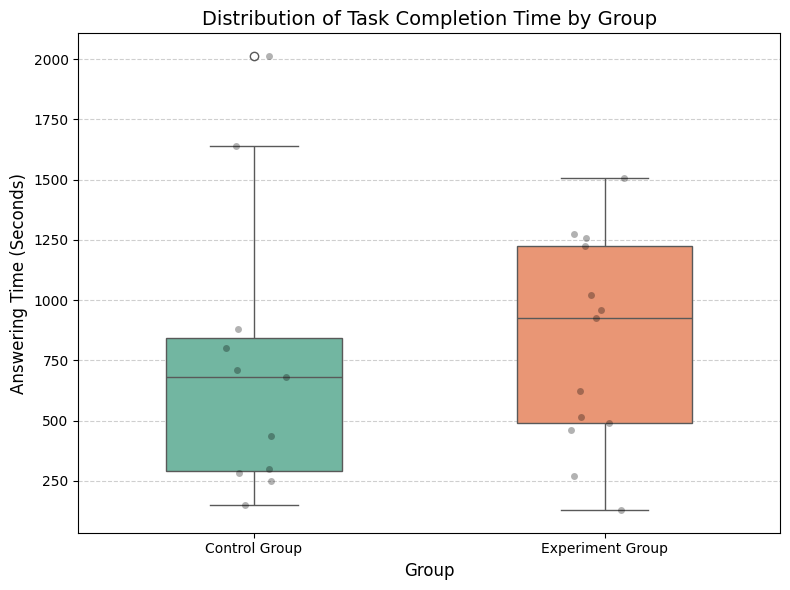

In [60]:
# =================================================================
# CELL: EFFICIENCY ANALYSIS (Time on Task)
# =================================================================


# 1. Define the Metric
efficiency_metric = "Question Answering Time"

# Ensure the column is numeric (handles potential conversion issues)
df_cleaned[efficiency_metric] = pd.to_numeric(df_cleaned[efficiency_metric], errors='coerce')

# 2. Filter Outliers (Excluding responses > 3600 seconds)
# We create a specific subset for efficiency to avoid losing data in other sections
initial_count = len(df_cleaned)
df_efficiency = df_cleaned[df_cleaned[efficiency_metric] <= 3600].copy()
removed_count = initial_count - len(df_efficiency)

print(f"--- Data Cleaning: Efficiency ---{initial_count}")
print(f"Participants removed (Time > 3600s): {removed_count}")
print(f"Final sample size for efficiency: {len(df_efficiency)}\n")

# 2. Descriptive Statistics by Group
stats_efficiency = df_efficiency.groupby('Group')[efficiency_metric].describe()

print(f"--- Descriptive Statistics: {efficiency_metric} (Seconds) ---")
print(stats_efficiency[['count', 'mean', 'std', 'min', '50%', 'max']].rename(columns={'50%': 'median'}))
print("\n")

# 3. Boxplot
plt.figure(figsize=(8, 6))

group_order = ['Control Group', 'Experiment Group']

# 2. Create the boxplot
# We use a muted palette and clear labels for academic presentation
sns.boxplot(
    x='Group', 
    y='Question Answering Time', 
    data=df_efficiency, 
    palette='Set2', 
    width=0.5,
    order = group_order
)

# 3. Add individual data points (jittered) 
# This helps visualize the sample size and distribution density
sns.stripplot(
    x='Group', 
    y='Question Answering Time', 
    data=df_efficiency, 
    color='black', 
    alpha=0.3, 
    jitter=True
)

# 4. Academic Formatting
plt.title('Distribution of Task Completion Time by Group', fontsize=14)
plt.ylabel('Answering Time (Seconds)', fontsize=12)
plt.xlabel('Group', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Improve layout and save
plt.tight_layout()
plt.savefig('efficiency_boxplot.png')

# 3. Inferential Statistics
groups = sorted(df_cleaned['Group'].unique())
if len(groups) >= 2:
    g1, g2 = groups[0], groups[1]
    data_g1 = df_efficiency[df_efficiency['Group'] == g1][efficiency_metric].dropna()
    data_g2 = df_efficiency[df_efficiency['Group'] == g2][efficiency_metric].dropna()

    # Normality Check (Shapiro-Wilk)
    # Time data is frequently non-normal
    _, p_norm1 = shapiro(data_g1)
    _, p_norm2 = shapiro(data_g2)
    is_normal = (p_norm1 > 0.05) and (p_norm2 > 0.05)

    # Statistical Tests
    t_stat, p_ttest = ttest_ind(data_g1, data_g2)
    u_stat, p_mann = mannwhitneyu(data_g1, data_g2)

    # Calculate Cohen's d (Effect Size)
    n1, n2 = len(data_g1), len(data_g2)
    m1, m2 = data_g1.mean(), data_g2.mean()
    v1, v2 = data_g1.var(ddof=1), data_g2.var(ddof=1)
    pooled_sd = np.sqrt(((n1 - 1) * v1 + (n2 - 1) * v2) / (n1 + n2 - 2))
    cohens_d = (m2 - m1) / pooled_sd

    print(f"--- Hypothesis Testing ( {g1} vs {g2} ) ---")
    print(f"Shapiro-Wilk Normality p-values: {g1}={p_norm1:.4f}, {g2}={p_norm2:.4f}")
    
    if not is_normal:
        print(f"Result: Data is non-normal. Reporting Mann-Whitney U test (Standard for time data).")
        print(f"Mann-Whitney U-Value: {u_stat:.1f}")
        print(f"Mann-Whitney p-value: {p_mann:.4f} {'(SIGNIFICANT)' if p_mann < 0.05 else ''}")
    else:
        print(f"Result: Data is normal. Reporting T-test.")
        print(f"T-test p-value: {p_ttest:.4f} {'(SIGNIFICANT)' if p_ttest < 0.05 else ''}")
        
    print(f"Cohen's d (Effect Size): {cohens_d:.4f}")